# Intensity distribution

In this notebook we conduct measurements with the photodiode and different constellations of the acousto-optic deflectors.

Thorlabs photodiode is set to 50dB.

In [1]:
import control
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

control.aom()
control.aod_h(frequency=100e6)
control.aod_v(frequency=100e6)

scope = control.MSOX6004A('172.22.22.30')
scope.holla()

'AGILENT TECHNOLOGIES,MSO-X 4054A,MY57310545,07.20.2017102615\n'

In [2]:
control.aom()
control.aod_h(frequency=100e6)
control.aod_v(frequency=100e6)

<Response [204]>

We will do multiple runs at different amplitudes. The following function will merge these runs into a single data frame with one time scale but different voltages for the different amplitude levels.

In [11]:
import os

datadir = 'intensity-data'

os.makedirs(datadir, exist_ok=True)

def to_hdf(filename, fieldname, data):
    df = pd.DataFrame(data)
    df.to_hdf(filename, fieldname, complevel=9)
    
    return df    

def asweep_to_hdf(filename, fieldname, data):
    return to_hdf(filename, fieldname, {'time': data[0][1]['time'], **{f'voltage@{d[0]:.2f}%': d[1]['voltage'] for d in data}})

def fsweep_to_hdf(filename, fieldname, data):
    return to_hdf(filename, fieldname, {'time': data[0][1]['time'], **{f'voltage@{(d[0] / 1e6):.2f}MHz': d[1]['voltage'] for d in data}})

## Unpaired

The unpaired measurements consider the constellation of only one single AOD mounted at a time.

### Horizontal AOD

We start with the AOD element anticipated to be in the horizontal slot.

#### Horizontal Slot

In the first run we will remove the vertical AOD element. The horizontal AOD element remains in the horizontal slot. We optimize incident beam angle for maximum first diffraction order intensity at 100 MHz and check beam alignment through the setup.

In [21]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_horizontal_socket', data).head(5)

KeyboardInterrupt: 

#### Vertical Slot

We extract the horizontal AOD element from the horizontal slot and insert it into the vertical slot. We again optimize for 
maximum first order intensity and check beam alignment.

In [81]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_vertical_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.066046,0.084456,0.102866,0.102866,0.102866,0.102866,0.139686,0.139686,0.139686,...,0.434247,0.434247,0.434247,0.452657,0.452657,0.452657,0.489477,0.471067,0.452657,0.489477
1,-0.000393,0.084456,0.066046,0.102866,0.084456,0.139686,0.102866,0.139686,0.158096,0.139686,...,0.434247,0.397427,0.452657,0.434247,0.434247,0.452657,0.452657,0.471067,0.489477,0.471067
2,-0.000393,0.066046,0.084456,0.102866,0.084456,0.084456,0.121276,0.102866,0.121276,0.176506,...,0.434247,0.452657,0.434247,0.452657,0.471067,0.452657,0.452657,0.471067,0.471067,0.489477
3,-0.000392,0.066046,0.102866,0.066046,0.084456,0.066046,0.121276,0.121276,0.121276,0.158096,...,0.434247,0.452657,0.452657,0.434247,0.452657,0.471067,0.452657,0.471067,0.471067,0.489477
4,-0.000392,0.084456,0.066046,0.084456,0.102866,0.084456,0.139686,0.139686,0.139686,0.102866,...,0.434247,0.434247,0.452657,0.434247,0.434247,0.434247,0.434247,0.471067,0.471067,0.489477


### Vertical AOD

Now we remove the horizontal AOD element and mount the vertical AOD element into the vertical slot. We repeat same alignments as before.

#### Vertical Slot

In [89]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_vertical_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.093515,0.110251,0.110251,0.110251,0.110251,0.126987,0.143724,0.143724,0.143724,...,0.57887,0.562134,0.578870,0.595607,0.595607,0.595607,0.612343,0.629079,0.629079,0.629079
1,-0.000393,0.093515,0.093515,0.093515,0.110251,0.126987,0.126987,0.143724,0.126987,0.177197,...,0.57887,0.578870,0.562134,0.595607,0.612343,0.612343,0.629079,0.629079,0.612343,0.612343
2,-0.000393,0.076778,0.093515,0.093515,0.110251,0.110251,0.126987,0.160460,0.160460,0.160460,...,0.57887,0.578870,0.562134,0.595607,0.595607,0.612343,0.612343,0.612343,0.612343,0.629079
3,-0.000392,0.076778,0.093515,0.110251,0.126987,0.093515,0.126987,0.143724,0.143724,0.160460,...,0.57887,0.562134,0.578870,0.612343,0.612343,0.612343,0.629079,0.629079,0.612343,0.612343
4,-0.000392,0.076778,0.060042,0.093515,0.110251,0.110251,0.126987,0.143724,0.143724,0.177197,...,0.57887,0.562134,0.595607,0.595607,0.612343,0.612343,0.629079,0.629079,0.629079,0.645816


#### Horizontal Slot

Vertical AOD is now placed into the horizontal slot and calibrations steps are repeated as before.

In [98]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_horizontal_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.029448,0.029448,0.040828,0.040828,0.052209,0.063590,0.052209,0.074971,0.074971,...,0.757816,0.803339,0.848862,0.883004,0.917146,0.951289,1.008192,1.030954,1.053715,1.076477
1,-0.000393,0.040828,0.040828,0.040828,0.040828,0.052209,0.063590,0.063590,0.052209,0.074971,...,0.780577,0.803339,0.860243,0.883004,0.917146,0.962669,0.996812,1.019573,1.053715,1.087858
2,-0.000393,0.018067,0.029448,0.018067,0.052209,0.052209,0.040828,0.063590,0.074971,0.063590,...,0.746435,0.803339,0.848862,0.894385,0.939908,0.951289,1.008192,1.042335,1.065096,1.087858
3,-0.000392,0.029448,0.040828,0.052209,0.040828,0.029448,0.063590,0.052209,0.074971,0.063590,...,0.769197,0.803339,0.860243,0.883004,0.939908,0.951289,1.008192,1.042335,1.042335,1.065096
4,-0.000392,0.040828,0.029448,0.052209,0.029448,0.052209,0.052209,0.052209,0.063590,0.063590,...,0.757816,0.791958,0.871623,0.894385,0.939908,0.974050,0.996812,1.030954,1.053715,1.087858


## Paired

The following constellations consider both AODs mounted and in use.

### Exchanged

Horizontal AOD is in vertical slot and feeded with vertical signal. Vertical AOD is in horizontal slot and feeded with horizontal signal. Because of weak signal photodiode is set to 70dB.

#### Sweep at different Frequencies

We apply a constant frequency to the vertical AOD and then sweep the horizontal AOD, whichafter we increase the frequency of the vertical AOD by 0.1MHz. This is done until the vertical AOD frequency reaches 110MHz.

In [77]:
data = []

control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=1, nodwells=[False, True])

for f_v in np.arange(80e6, 120e6+1e5, 1e5):
    control.aod_v(frequency=f_v)

    data.append((f_v, scope.capture()))
    
fsweep_to_hdf(os.path.join(datadir, 'exchanged-frequency.h5'), 'vsweep', data).head(5)

,time,voltage@80.00MHz,voltage@80.10MHz,voltage@80.20MHz,voltage@80.30MHz,voltage@80.40MHz,voltage@80.50MHz,voltage@80.60MHz,voltage@80.70MHz,voltage@80.80MHz,...,voltage@119.10MHz,voltage@119.20MHz,voltage@119.30MHz,voltage@119.40MHz,voltage@119.50MHz,voltage@119.60MHz,voltage@119.70MHz,voltage@119.80MHz,voltage@119.90MHz,voltage@120.00MHz
0,-0.019688,0.040628,0.047322,0.040628,0.047322,0.040628,0.047322,0.040628,0.040628,0.033933,...,0.060711,0.060711,0.060711,0.060711,0.060711,0.060711,0.054017,0.054017,0.060711,0.067406
1,-0.019683,0.040628,0.040628,0.040628,0.033933,0.033933,0.040628,0.040628,0.047322,0.047322,...,0.060711,0.067406,0.060711,0.060711,0.060711,0.060711,0.067406,0.047322,0.060711,0.060711
2,-0.019678,0.040628,0.040628,0.040628,0.040628,0.040628,0.040628,0.040628,0.040628,0.040628,...,0.067406,0.067406,0.060711,0.067406,0.060711,0.060711,0.060711,0.060711,0.054017,0.060711
3,-0.019674,0.047322,0.040628,0.033933,0.047322,0.033933,0.047322,0.040628,0.040628,0.040628,...,0.060711,0.060711,0.067406,0.060711,0.067406,0.060711,0.060711,0.060711,0.067406,0.054017
4,-0.019669,0.040628,0.047322,0.033933,0.040628,0.047322,0.047322,0.047322,0.054017,0.040628,...,0.067406,0.060711,0.067406,0.067406,0.054017,0.067406,0.060711,0.054017,0.054017,0.054017


Now we apply a constant frequency to the AOD in the horizontal slot and sweep the frequency of the AOD in the vertical slot, whichafter the frequency of the AOD in the horizontal slot is increased by 0.1 MHz.

In [83]:
data = []

control.aod_v(frequency=[80e6, 120e6], duration=260e-3, amplitude=1, nodwells=[False, True])

for f_h in np.arange(80e6, 120e6+1e5, 1e5):
    control.aod_h(frequency=f_h)

    data.append((f_h, scope.capture()))
    
fsweep_to_hdf(os.path.join(datadir, 'exchanged-frequency.h5'), 'hsweep', data).head(5)

,time,voltage@80.00MHz,voltage@80.10MHz,voltage@80.20MHz,voltage@80.30MHz,voltage@80.40MHz,voltage@80.50MHz,voltage@80.60MHz,voltage@80.70MHz,voltage@80.80MHz,...,voltage@119.10MHz,voltage@119.20MHz,voltage@119.30MHz,voltage@119.40MHz,voltage@119.50MHz,voltage@119.60MHz,voltage@119.70MHz,voltage@119.80MHz,voltage@119.90MHz,voltage@120.00MHz
0,-0.019688,0.047322,0.047322,0.047322,0.054017,0.047322,0.047322,0.047322,0.054017,0.047322,...,0.361966,0.361966,0.355272,0.355272,0.348577,0.348577,0.341883,0.341883,0.335188,0.341883
1,-0.019683,0.047322,0.047322,0.040628,0.054017,0.047322,0.054017,0.047322,0.047322,0.047322,...,0.361966,0.361966,0.355272,0.348577,0.348577,0.341883,0.341883,0.348577,0.335188,0.341883
2,-0.019678,0.047322,0.040628,0.047322,0.047322,0.047322,0.040628,0.047322,0.047322,0.047322,...,0.355272,0.368661,0.355272,0.348577,0.361966,0.348577,0.341883,0.341883,0.335188,0.335188
3,-0.019674,0.047322,0.047322,0.047322,0.047322,0.047322,0.040628,0.040628,0.054017,0.047322,...,0.355272,0.368661,0.348577,0.341883,0.348577,0.341883,0.341883,0.355272,0.335188,0.328494
4,-0.019669,0.040628,0.047322,0.047322,0.047322,0.054017,0.047322,0.047322,0.060711,0.047322,...,0.355272,0.368661,0.348577,0.348577,0.355272,0.341883,0.341883,0.355272,0.341883,0.335188


#### Sweep at different Amplitudes

Finally we want take set one AOD to the center frequency of 100 MHz and while the other AOD sweeps from 90 to 110 MHz at different amplitude values. This we can compare to the results obtained with only a single AOD mounted. We start with the horizontal AOD being fixed at 100 MHz.

In [113]:
data = []

control.aod_h(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_v(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))
    
asweep_to_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'vsweep', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.019688,0.402364,0.492741,0.583117,0.623285,0.733745,0.814080,0.914498,0.994833,1.065126,...,1.055084,1.045042,1.024958,1.014916,1.004874,1.014916,1.024958,1.024958,1.035000,1.045042
1,-0.019683,0.412406,0.502782,0.583117,0.663452,0.733745,0.824121,0.914498,0.984791,1.065126,...,1.055084,1.035000,1.035000,1.014916,1.014916,1.014916,1.035000,1.024958,1.035000,1.035000
2,-0.019678,0.412406,0.502782,0.563033,0.653410,0.723703,0.824121,0.904456,0.984791,1.065126,...,1.045042,1.045042,1.024958,1.014916,1.014916,1.014916,1.024958,1.024958,1.045042,1.055084
3,-0.019674,0.402364,0.472657,0.563033,0.643368,0.733745,0.814080,0.904456,0.984791,1.065126,...,1.075167,1.055084,1.014916,1.014916,1.024958,1.024958,1.024958,1.024958,1.035000,1.045042
4,-0.019669,0.402364,0.492741,0.552992,0.653410,0.733745,0.834163,0.904456,1.004874,1.055084,...,1.065126,1.024958,1.024958,1.014916,1.014916,1.014916,1.014916,1.024958,1.035000,1.035000


Now the AOD in the vertical slot is fixed at 100 MHz and we sweep the AOD in the horizontal slot at different amplitude values.

In [114]:
data = []

control.aod_v(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))
    
asweep_to_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'hsweep', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.019688,0.050900,0.070983,0.060941,0.070983,0.081025,0.081025,0.091067,0.101109,0.101109,...,0.101109,0.111151,0.101109,0.101109,0.101109,0.111151,0.111151,0.111151,0.121193,0.101109
1,-0.019683,0.060941,0.060941,0.070983,0.081025,0.081025,0.081025,0.091067,0.070983,0.091067,...,0.111151,0.101109,0.111151,0.111151,0.101109,0.101109,0.111151,0.101109,0.111151,0.121193
2,-0.019678,0.050900,0.070983,0.070983,0.070983,0.070983,0.091067,0.081025,0.101109,0.101109,...,0.101109,0.091067,0.101109,0.111151,0.111151,0.091067,0.101109,0.101109,0.091067,0.111151
3,-0.019674,0.070983,0.070983,0.060941,0.081025,0.070983,0.091067,0.091067,0.091067,0.091067,...,0.101109,0.091067,0.111151,0.121193,0.111151,0.101109,0.101109,0.111151,0.121193,0.131234
4,-0.019669,0.070983,0.050900,0.070983,0.070983,0.060941,0.081025,0.081025,0.091067,0.101109,...,0.101109,0.101109,0.111151,0.111151,0.101109,0.111151,0.111151,0.121193,0.101109,0.111151


### Anticipated

The AOD elements are now again exchanged in their anticipated slots and we repeat the previous measurements for this constellation with the photodiode set back to 50 dB.

#### Sweeps at different Amplitudes

In [122]:
data = []

control.aod_h(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_v(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))
    
asweep_to_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'vsweep', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.019688,0.450142,0.550561,0.617506,0.701188,0.784870,0.918761,1.019180,1.119598,1.236753,...,2.726293,2.726293,2.709556,2.692820,2.692820,2.743029,2.726293,2.743029,2.743029,2.726293
1,-0.019683,0.450142,0.550561,0.600770,0.717925,0.801607,0.902025,1.035916,1.119598,1.236753,...,2.709556,2.692820,2.726293,2.692820,2.692820,2.759766,2.743029,2.743029,2.743029,2.709556
2,-0.019678,0.450142,0.517088,0.617506,0.684452,0.801607,0.918761,1.035916,1.136335,1.253490,...,2.726293,2.709556,2.692820,2.709556,2.692820,2.743029,2.743029,2.709556,2.743029,2.726293
3,-0.019674,0.466879,0.550561,0.634243,0.734661,0.818343,0.885289,1.019180,1.119598,1.236753,...,2.692820,2.692820,2.709556,2.692820,2.709556,2.743029,2.759766,2.743029,2.743029,2.726293
4,-0.019669,0.466879,0.533824,0.617506,0.717925,0.818343,0.918761,1.035916,1.136335,1.236753,...,2.692820,2.726293,2.726293,2.709556,2.692820,2.726293,2.726293,2.743029,2.726293,2.726293


In [127]:
data = []

control.aod_v(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))
    
asweep_to_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'hsweep', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.019688,0.617506,0.751397,0.918761,0.968971,1.136335,1.236753,1.387381,1.454326,1.638427,...,1.604954,1.538008,1.538008,1.487799,1.471063,1.454326,1.454326,1.454326,1.437590,1.454326
1,-0.019683,0.617506,0.751397,0.935498,0.985707,1.119598,1.253490,1.404117,1.471063,1.621690,...,1.604954,1.588218,1.538008,1.504536,1.471063,1.454326,1.454326,1.454326,1.437590,1.454326
2,-0.019678,0.617506,0.734661,0.918761,0.985707,1.102862,1.236753,1.387381,1.454326,1.655163,...,1.604954,1.571481,1.538008,1.487799,1.454326,1.471063,1.471063,1.454326,1.454326,1.471063
3,-0.019674,0.617506,0.734661,0.935498,1.002444,1.119598,1.220017,1.370644,1.454326,1.621690,...,1.621690,1.571481,1.521272,1.504536,1.471063,1.437590,1.454326,1.437590,1.437590,1.471063
4,-0.019669,0.617506,0.717925,0.935498,0.985707,1.119598,1.236753,1.370644,1.471063,1.638427,...,1.604954,1.588218,1.504536,1.487799,1.471063,1.437590,1.454326,1.454326,1.437590,1.454326


#### Sweep at different Frequencies

In [132]:
data = []

control.aod_v(frequency=[80e6, 120e6], duration=260e-3, amplitude=1, nodwells=[False, True])

for f_h in np.arange(80e6, 120e6+1e5, 1e5):
    control.aod_h(frequency=f_h)

    data.append((f_h, scope.capture()))
    
fsweep_to_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'hsweep', data).head(5)

,time,voltage@80.00MHz,voltage@80.10MHz,voltage@80.20MHz,voltage@80.30MHz,voltage@80.40MHz,voltage@80.50MHz,voltage@80.60MHz,voltage@80.70MHz,voltage@80.80MHz,...,voltage@119.10MHz,voltage@119.20MHz,voltage@119.30MHz,voltage@119.40MHz,voltage@119.50MHz,voltage@119.60MHz,voltage@119.70MHz,voltage@119.80MHz,voltage@119.90MHz,voltage@120.00MHz
0,-0.019688,0.361907,0.361907,0.384668,0.430191,0.452953,0.452953,0.475714,0.498476,0.521237,...,2.319396,2.296635,2.228350,2.205589,2.114543,2.114543,2.023497,2.000735,1.955212,1.909689
1,-0.019683,0.361907,0.361907,0.407430,0.407430,0.430191,0.452953,0.498476,0.498476,0.521237,...,2.319396,2.296635,2.251112,2.228350,2.137304,2.137304,2.023497,2.023497,1.932451,1.909689
2,-0.019678,0.361907,0.384668,0.407430,0.407430,0.452953,0.452953,0.498476,0.521237,0.543999,...,2.319396,2.296635,2.228350,2.205589,2.137304,2.114543,2.069020,1.977974,1.977974,1.909689
3,-0.019674,0.361907,0.339145,0.384668,0.430191,0.475714,0.475714,0.521237,0.498476,0.543999,...,2.319396,2.273873,2.228350,2.205589,2.137304,2.091781,2.046258,2.046258,1.977974,1.909689
4,-0.019669,0.339145,0.339145,0.384668,0.430191,0.430191,0.475714,0.475714,0.498476,0.543999,...,2.342158,2.273873,2.228350,2.205589,2.137304,2.091781,2.069020,2.000735,1.977974,1.909689


In [134]:
data = []

control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=1, nodwells=[False, True])

for f_v in np.arange(80e6, 120e6+1e5, 1e5):
    control.aod_v(frequency=f_v)

    data.append((f_v, scope.capture()))
    
fsweep_to_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'vsweep', data).head(5)

,time,voltage@80.00MHz,voltage@80.10MHz,voltage@80.20MHz,voltage@80.30MHz,voltage@80.40MHz,voltage@80.50MHz,voltage@80.60MHz,voltage@80.70MHz,voltage@80.80MHz,...,voltage@119.10MHz,voltage@119.20MHz,voltage@119.30MHz,voltage@119.40MHz,voltage@119.50MHz,voltage@119.60MHz,voltage@119.70MHz,voltage@119.80MHz,voltage@119.90MHz,voltage@120.00MHz
0,-0.019688,0.293622,0.316384,0.339145,0.361907,0.407430,0.407430,0.430191,0.430191,0.452953,...,1.499982,1.499982,1.454459,1.477221,1.431698,1.408936,1.408936,1.431698,1.363413,1.363413
1,-0.019683,0.316384,0.339145,0.339145,0.384668,0.407430,0.430191,0.452953,0.452953,0.475714,...,1.522744,1.477221,1.477221,1.477221,1.431698,1.408936,1.386175,1.408936,1.386175,1.340652
2,-0.019678,0.339145,0.339145,0.339145,0.407430,0.407430,0.407430,0.430191,0.407430,0.452953,...,1.499982,1.499982,1.499982,1.454459,1.431698,1.408936,1.386175,1.386175,1.386175,1.340652
3,-0.019674,0.316384,0.361907,0.339145,0.361907,0.384668,0.407430,0.430191,0.407430,0.452953,...,1.522744,1.477221,1.454459,1.477221,1.454459,1.431698,1.386175,1.386175,1.363413,1.340652
4,-0.019669,0.316384,0.361907,0.361907,0.384668,0.407430,0.407430,0.430191,0.430191,0.452953,...,1.522744,1.477221,1.477221,1.454459,1.431698,1.408936,1.386175,1.386175,1.408936,1.317890


## Random sampling


In [24]:
filename = os.path.join(datadir, 'anticipated-random.csv')

if not os.path.exists(filename):
    with open(filename, 'w') as file:
        file.write('hfrequency,vfrequency,voltage\n')

with open(filename, 'a', 1) as file:
    while True:
        fh, fv = np.random.uniform(80e6, 120e6, 2)

        control.aod_h(frequency=fh, amplitude=1)
        control.aod_v(frequency=fv, amplitude=1)

        U = scope.capture().voltage.mean()
    
        file.write(f'{fh},{fv},{U}\n')

KeyboardInterrupt: 

In [37]:
df = scope.capture(delay=2000)

control.aod_h(frequency=100e6)

df.to_hdf(os.path.join(datadir, 'signal-generator.5'), 'RS-SML02')

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'RS-SML02'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [36]:
df = scope.capture(delay=2000)

control.aod_h(frequency=100e6)
control.aod_v(frequency=[80e6, 120e6], duration=.8)

df.to_hdf(os.path.join(datadir, 'signal-generator.h5'), 'DDS')

In [38]:
a = pd.read_hdf(os.path.join(datadir, 'signal-generator.5'), 'RS-SML02')
b = pd.read_hdf(os.path.join(datadir, 'signal-generator.h5'), 'DDS')

In [21]:
a = a[(a.time > 0) & (a.time < .8)]
b = b[(b.time > 0) & (b.time < .8)]

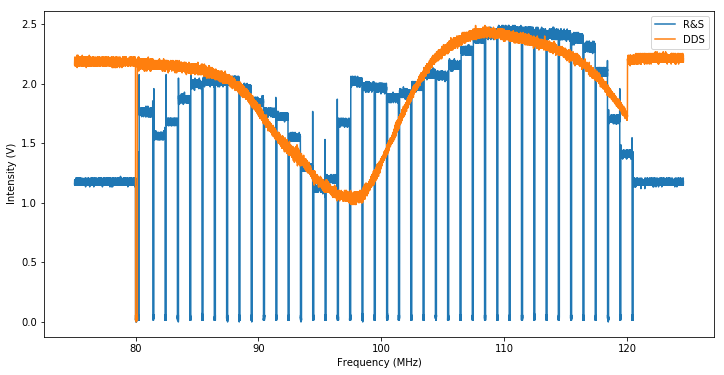

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(80 + 50*a.time, a.voltage, label='R&S')
plt.plot(80 + 50*b.time, b.voltage, label='DDS')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (V)')
plt.legend()
plt.savefig(os.path.join(datadir, 'signal-generator.pdf'))
plt.show()

# Incident Angles

We install the horizontal AOD in the horizontal slot. First at an approximate perpendicular beam incident position then rotated to the left and to the right.

* Photodiode gain set to 60 dB
* Oscilloscope time divs at 28 ms with offset 133.5 ms
* Oscilloscope voltage divs at 610 mV and 2.15 V offset

In [12]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'perp', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.169664,0.169664,0.190083,0.210501,0.292175,0.312593,0.353430,0.353430,0.394267,...,1.721463,1.823555,1.864392,1.946066,1.864392,1.864392,1.803137,1.762300,1.721463,1.660208
1,-0.006558,0.210501,0.169664,0.169664,0.210501,0.271756,0.312593,0.353430,0.333012,0.414685,...,1.741882,1.823555,1.864392,1.905229,1.884811,1.843974,1.823555,1.741882,1.701045,1.680627
2,-0.006554,0.190083,0.190083,0.149246,0.169664,0.251338,0.292175,0.333012,0.373848,0.435104,...,1.762300,1.823555,1.864392,1.905229,1.905229,1.864392,1.803137,1.741882,1.701045,1.680627
3,-0.006549,0.169664,0.149246,0.149246,0.190083,0.230920,0.312593,0.353430,0.394267,0.394267,...,1.721463,1.823555,1.864392,1.884811,1.884811,1.843974,1.803137,1.741882,1.701045,1.680627
4,-0.006545,0.190083,0.190083,0.190083,0.190083,0.271756,0.312593,0.353430,0.353430,0.414685,...,1.721463,1.803137,1.843974,1.905229,1.864392,1.843974,1.823555,1.762300,1.721463,1.680627


In [13]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'left', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.271756,0.312593,0.435104,0.516777,0.578033,0.618869,0.598451,0.761798,0.925145,...,3.640794,3.579539,3.518283,3.375355,3.293681,3.212007,3.171170,3.171170,3.191589,3.232426
1,-0.006558,0.271756,0.312593,0.435104,0.496359,0.578033,0.618869,0.618869,0.761798,0.945564,...,3.640794,3.579539,3.518283,3.375355,3.273262,3.212007,3.171170,3.171170,3.191589,3.212007
2,-0.006554,0.251338,0.312593,0.435104,0.537196,0.578033,0.598451,0.618869,0.741380,0.925145,...,3.681631,3.579539,3.497865,3.375355,3.273262,3.191589,3.191589,3.130334,3.191589,3.191589
3,-0.006549,0.292175,0.333012,0.414685,0.537196,0.578033,0.618869,0.618869,0.741380,0.925145,...,3.620375,3.599957,3.518283,3.395773,3.293681,3.232426,3.171170,3.130334,3.191589,3.232426
4,-0.006545,0.271756,0.312593,0.455522,0.537196,0.578033,0.598451,0.578033,0.741380,0.945564,...,3.661212,3.579539,3.497865,3.354936,3.293681,3.191589,3.171170,3.150752,3.150752,3.212007


In [14]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'right', data).head(5)

,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.149246,0.149246,0.169664,0.210501,0.210501,0.230920,0.292175,0.312593,0.373848,...,1.272258,1.292677,1.292677,1.292677,1.292677,1.333514,1.313095,1.333514,1.333514,1.313095
1,-0.006558,0.128828,0.149246,0.169664,0.190083,0.251338,0.271756,0.292175,0.312593,0.373848,...,1.251840,1.272258,1.313095,1.292677,1.313095,1.313095,1.313095,1.292677,1.333514,1.353932
2,-0.006554,0.128828,0.169664,0.169664,0.190083,0.210501,0.271756,0.292175,0.333012,0.353430,...,1.231422,1.292677,1.313095,1.272258,1.313095,1.292677,1.313095,1.333514,1.313095,1.333514
3,-0.006549,0.128828,0.169664,0.190083,0.169664,0.210501,0.251338,0.292175,0.312593,0.353430,...,1.231422,1.272258,1.292677,1.313095,1.313095,1.333514,1.313095,1.313095,1.333514,1.333514
4,-0.006545,0.149246,0.108409,0.169664,0.210501,0.230920,0.271756,0.292175,0.333012,0.373848,...,1.251840,1.251840,1.292677,1.313095,1.313095,1.292677,1.313095,1.313095,1.333514,1.353932


# Polarisation

We install the horizontal AOD in the horizontal slot and change the polarisation.

* Photodiode gain set to 60 dB
* Oscilloscope time divs at 28 ms with offset 133.5 ms
* Oscilloscope voltage divs at 610 mV and 2.15 V offset

In [15]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '129', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '129'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.190083,0.210501,0.292175,0.312593,0.333012,0.394267,0.475940,0.537196,0.639288,...,2.313597,2.334016,2.334016,2.313597,2.313597,2.313597,2.252342,2.252342,2.231924,2.231924
1,-0.006558,0.169664,0.271756,0.271756,0.312593,0.353430,0.394267,0.455522,0.537196,0.618869,...,2.334016,2.313597,2.334016,2.313597,2.334016,2.313597,2.272760,2.252342,2.231924,2.211505
2,-0.006554,0.190083,0.210501,0.271756,0.292175,0.312593,0.373848,0.475940,0.516777,0.598451,...,2.313597,2.334016,2.334016,2.313597,2.293179,2.293179,2.231924,2.231924,2.252342,2.231924
3,-0.006549,0.210501,0.251338,0.292175,0.292175,0.333012,0.394267,0.475940,0.516777,0.578033,...,2.334016,2.313597,2.334016,2.293179,2.313597,2.313597,2.272760,2.231924,2.231924,2.191087
4,-0.006545,0.210501,0.251338,0.271756,0.271756,0.353430,0.353430,0.475940,0.578033,0.618869,...,2.313597,2.334016,2.334016,2.334016,2.334016,2.293179,2.252342,2.252342,2.231924,2.211505


In [16]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '120', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '120'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.149246,0.190083,0.169664,0.210501,0.251338,0.251338,0.333012,0.353430,0.373848,...,1.537698,1.537698,1.496861,1.496861,1.476443,1.476443,1.456024,1.456024,1.435606,1.415187
1,-0.006558,0.149246,0.149246,0.169664,0.210501,0.230920,0.292175,0.312593,0.373848,0.373848,...,1.537698,1.537698,1.517279,1.496861,1.496861,1.476443,1.476443,1.456024,1.456024,1.435606
2,-0.006554,0.149246,0.149246,0.169664,0.210501,0.230920,0.292175,0.292175,0.353430,0.394267,...,1.537698,1.537698,1.496861,1.496861,1.476443,1.476443,1.456024,1.456024,1.435606,1.394769
3,-0.006549,0.128828,0.169664,0.190083,0.190083,0.251338,0.271756,0.292175,0.333012,0.373848,...,1.558116,1.517279,1.537698,1.496861,1.476443,1.496861,1.476443,1.456024,1.435606,1.415187
4,-0.006545,0.128828,0.190083,0.169664,0.190083,0.251338,0.271756,0.333012,0.373848,0.394267,...,1.558116,1.496861,1.517279,1.496861,1.476443,1.476443,1.456024,1.435606,1.456024,1.415187


In [17]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '110', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '110'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.067572,0.087991,0.108409,0.087991,0.108409,0.128828,0.108409,0.149246,0.128828,...,0.455522,0.455522,0.435104,0.435104,0.455522,0.435104,0.414685,0.414685,0.414685,0.414685
1,-0.006558,0.067572,0.087991,0.087991,0.108409,0.128828,0.128828,0.108409,0.128828,0.149246,...,0.435104,0.435104,0.435104,0.435104,0.435104,0.414685,0.414685,0.455522,0.414685,0.414685
2,-0.006554,0.087991,0.108409,0.087991,0.108409,0.108409,0.128828,0.149246,0.149246,0.169664,...,0.414685,0.435104,0.435104,0.455522,0.414685,0.414685,0.414685,0.435104,0.414685,0.414685
3,-0.006549,0.087991,0.108409,0.108409,0.087991,0.108409,0.149246,0.128828,0.128828,0.149246,...,0.414685,0.455522,0.414685,0.435104,0.435104,0.435104,0.414685,0.435104,0.414685,0.435104
4,-0.006545,0.108409,0.087991,0.108409,0.128828,0.128828,0.087991,0.128828,0.149246,0.149246,...,0.435104,0.414685,0.414685,0.435104,0.435104,0.414685,0.435104,0.435104,0.435104,0.435104


In [18]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '100', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '100'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.067572,0.047154,0.047154,0.047154,0.067572,0.067572,0.047154,0.067572,0.047154,...,0.128828,0.128828,0.190083,0.128828,0.169664,0.128828,0.128828,0.149246,0.149246,0.108409
1,-0.006558,0.067572,0.047154,0.067572,0.047154,0.087991,0.067572,0.067572,0.067572,0.067572,...,0.149246,0.149246,0.149246,0.149246,0.149246,0.149246,0.128828,0.149246,0.149246,0.128828
2,-0.006554,0.047154,0.047154,0.047154,0.047154,0.067572,0.067572,0.047154,0.067572,0.087991,...,0.128828,0.149246,0.128828,0.128828,0.149246,0.149246,0.128828,0.128828,0.128828,0.149246
3,-0.006549,0.006317,0.026735,0.047154,0.047154,0.047154,0.047154,0.067572,0.026735,0.047154,...,0.149246,0.128828,0.128828,0.149246,0.128828,0.149246,0.149246,0.128828,0.149246,0.128828
4,-0.006545,0.047154,0.047154,0.047154,0.047154,0.047154,0.067572,0.067572,0.047154,0.047154,...,0.128828,0.149246,0.149246,0.149246,0.149246,0.149246,0.149246,0.108409,0.149246,0.169664


In [19]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '130', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '130'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.169664,0.190083,0.230920,0.271756,0.292175,0.312593,0.312593,0.353430,0.414685,...,1.598953,1.639790,1.701045,1.741882,1.762300,1.823555,1.803137,1.843974,1.843974,1.843974
1,-0.006558,0.149246,0.169664,0.210501,0.251338,0.271756,0.292175,0.333012,0.373848,0.435104,...,1.639790,1.660208,1.701045,1.721463,1.762300,1.762300,1.823555,1.803137,1.864392,1.864392
2,-0.006554,0.149246,0.190083,0.210501,0.251338,0.271756,0.271756,0.333012,0.353430,0.414685,...,1.619371,1.639790,1.701045,1.741882,1.721463,1.762300,1.823555,1.823555,1.843974,1.864392
3,-0.006549,0.149246,0.169664,0.230920,0.230920,0.271756,0.292175,0.333012,0.373848,0.394267,...,1.619371,1.660208,1.680627,1.721463,1.741882,1.782719,1.803137,1.823555,1.843974,1.843974
4,-0.006545,0.149246,0.190083,0.230920,0.251338,0.271756,0.312593,0.333012,0.373848,0.435104,...,1.639790,1.639790,1.680627,1.721463,1.762300,1.741882,1.782719,1.843974,1.823555,1.843974


In [20]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '140', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '140'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.108409,0.108409,0.128828,0.128828,0.149246,0.169664,0.169664,0.169664,0.190083,...,0.761798,0.782217,0.802635,0.802635,0.823053,0.802635,0.843472,0.843472,0.863890,0.863890
1,-0.006558,0.087991,0.128828,0.128828,0.149246,0.128828,0.149246,0.190083,0.210501,0.190083,...,0.761798,0.782217,0.802635,0.823053,0.823053,0.823053,0.823053,0.863890,0.863890,0.843472
2,-0.006554,0.108409,0.087991,0.128828,0.128828,0.169664,0.190083,0.169664,0.210501,0.230920,...,0.782217,0.761798,0.782217,0.802635,0.802635,0.823053,0.863890,0.843472,0.863890,0.843472
3,-0.006549,0.108409,0.108409,0.149246,0.149246,0.149246,0.149246,0.169664,0.210501,0.210501,...,0.741380,0.761798,0.761798,0.802635,0.802635,0.823053,0.823053,0.843472,0.843472,0.863890
4,-0.006545,0.108409,0.108409,0.128828,0.149246,0.128828,0.169664,0.190083,0.190083,0.190083,...,0.761798,0.782217,0.782217,0.823053,0.843472,0.823053,0.843472,0.843472,0.863890,0.843472


In [21]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '150', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '150'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.067572,0.067572,0.067572,0.108409,0.087991,0.067572,0.087991,0.067572,0.087991,...,0.230920,0.251338,0.251338,0.251338,0.271756,0.271756,0.292175,0.271756,0.271756,0.292175
1,-0.006558,0.067572,0.067572,0.047154,0.026735,0.067572,0.087991,0.108409,0.087991,0.108409,...,0.230920,0.271756,0.271756,0.251338,0.251338,0.251338,0.292175,0.251338,0.292175,0.271756
2,-0.006554,0.067572,0.067572,0.047154,0.067572,0.067572,0.067572,0.067572,0.067572,0.087991,...,0.251338,0.230920,0.271756,0.271756,0.251338,0.271756,0.292175,0.292175,0.271756,0.292175
3,-0.006549,0.047154,0.067572,0.087991,0.067572,0.047154,0.067572,0.087991,0.087991,0.108409,...,0.271756,0.251338,0.271756,0.271756,0.271756,0.271756,0.292175,0.251338,0.271756,0.271756
4,-0.006545,0.047154,0.067572,0.047154,0.067572,0.087991,0.047154,0.067572,0.087991,0.108409,...,0.251338,0.251338,0.251338,0.292175,0.271756,0.251338,0.292175,0.251338,0.271756,0.292175


In [22]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '131', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '131'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.149246,0.210501,0.190083,0.230920,0.230920,0.271756,0.333012,0.373848,0.414685,...,1.578535,1.598953,1.619371,1.619371,1.660208,1.680627,1.701045,1.741882,1.721463,1.782719
1,-0.006558,0.149246,0.190083,0.190083,0.230920,0.292175,0.271756,0.312593,0.373848,0.414685,...,1.619371,1.598953,1.619371,1.619371,1.660208,1.701045,1.721463,1.721463,1.782719,1.762300
2,-0.006554,0.169664,0.190083,0.190083,0.251338,0.292175,0.292175,0.312593,0.373848,0.435104,...,1.578535,1.578535,1.619371,1.639790,1.660208,1.701045,1.701045,1.762300,1.741882,1.782719
3,-0.006549,0.149246,0.169664,0.210501,0.230920,0.251338,0.292175,0.333012,0.373848,0.455522,...,1.578535,1.598953,1.619371,1.660208,1.680627,1.701045,1.721463,1.762300,1.762300,1.782719
4,-0.006545,0.149246,0.190083,0.230920,0.230920,0.251338,0.292175,0.353430,0.394267,0.435104,...,1.598953,1.598953,1.598953,1.639790,1.701045,1.680627,1.741882,1.721463,1.741882,1.782719


In [23]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '132', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '132'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.128828,0.190083,0.210501,0.230920,0.251338,0.251338,0.333012,0.414685,0.394267,...,1.517279,1.496861,1.537698,1.537698,1.558116,1.578535,1.598953,1.619371,1.639790,1.680627
1,-0.006558,0.169664,0.169664,0.210501,0.190083,0.251338,0.292175,0.312593,0.333012,0.394267,...,1.496861,1.496861,1.496861,1.517279,1.578535,1.578535,1.598953,1.639790,1.660208,1.660208
2,-0.006554,0.149246,0.169664,0.210501,0.230920,0.251338,0.271756,0.312593,0.353430,0.394267,...,1.496861,1.517279,1.517279,1.517279,1.578535,1.558116,1.619371,1.639790,1.639790,1.639790
3,-0.006549,0.149246,0.190083,0.190083,0.230920,0.251338,0.292175,0.333012,0.373848,0.373848,...,1.496861,1.517279,1.517279,1.517279,1.578535,1.578535,1.619371,1.619371,1.639790,1.680627
4,-0.006545,0.128828,0.169664,0.210501,0.210501,0.251338,0.271756,0.312593,0.353430,0.394267,...,1.496861,1.517279,1.537698,1.537698,1.558116,1.578535,1.619371,1.639790,1.639790,1.660208


In [25]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[80e6, 120e6], duration=260e-3, amplitude=A, nodwells=[False, True])

    data.append((A, scope.capture()))

asweep_to_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '128', data).head(5)

C:\Users\exp-caesium\AppData\Local\Programs\Python\Python36\lib\site-packages\tables\path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '128'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


,time,voltage@0.20%,voltage@0.22%,voltage@0.24%,voltage@0.26%,voltage@0.28%,voltage@0.30%,voltage@0.32%,voltage@0.34%,voltage@0.36%,...,voltage@0.82%,voltage@0.84%,voltage@0.86%,voltage@0.88%,voltage@0.90%,voltage@0.92%,voltage@0.94%,voltage@0.96%,voltage@0.98%,voltage@1.00%
0,-0.006562,0.169664,0.210501,0.251338,0.292175,0.353430,0.353430,0.435104,0.475940,0.516777,...,1.864392,1.986903,2.048158,2.068576,2.088995,2.068576,2.048158,2.007321,1.946066,1.884811
1,-0.006558,0.190083,0.210501,0.230920,0.271756,0.312593,0.353430,0.455522,0.475940,0.537196,...,1.884811,1.986903,2.048158,2.068576,2.088995,2.068576,2.048158,1.986903,1.925648,1.884811
2,-0.006554,0.190083,0.210501,0.251338,0.292175,0.333012,0.373848,0.435104,0.475940,0.537196,...,1.843974,1.986903,2.068576,2.068576,2.129832,2.068576,2.048158,2.027740,1.946066,1.884811
3,-0.006549,0.190083,0.190083,0.251338,0.292175,0.312593,0.333012,0.435104,0.496359,0.516777,...,1.884811,1.966484,2.048158,2.068576,2.109413,2.068576,2.027740,2.027740,1.905229,1.884811
4,-0.006545,0.210501,0.210501,0.230920,0.271756,0.333012,0.394267,0.455522,0.475940,0.496359,...,1.884811,1.986903,2.027740,2.068576,2.109413,2.068576,2.048158,2.027740,1.946066,1.884811


**Naming error. 128 -> 126, 129 -> 128, 131 -> 132, 132 -> 134!!**